# Analisis de datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("datos_analisis.csv")

### Sobre el número total de articulos:
**¿Cuál es el número total de articulos recopiladas?**

In [2]:
num_filas = data.shape[0]
print(f"El numero total es {num_filas}")

El numero total es 719


### Número de articulos por mes:
- **¿Cuántos articulos se publicaron cada mes?**
- **¿Cuál fue el mes con más y menos articulos publicadas?**

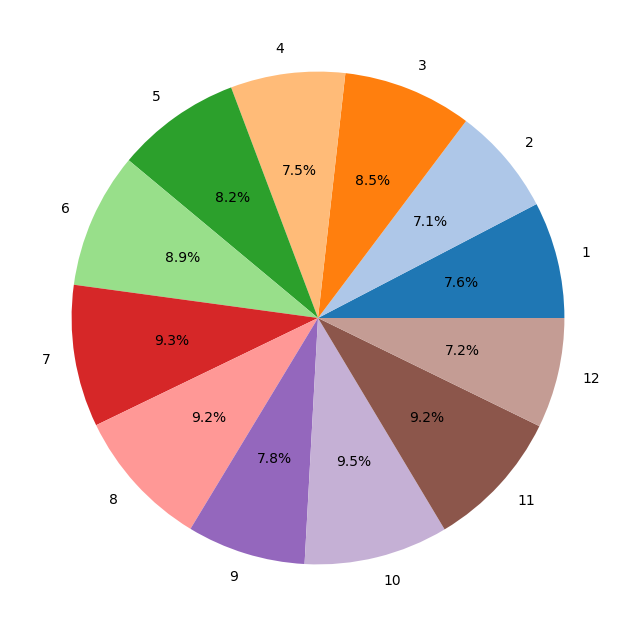

Mes
1     55
2     51
3     61
4     54
5     59
6     64
7     67
8     66
9     56
10    68
11    66
12    52
Name: count, dtype: int64
Mes con mayor articulos: 10 
Mes con menor articulos: 2


In [3]:
df_month = pd.DataFrame(data)

# Convierte a un formato datatime 
df_month["Fecha"] = pd.to_datetime(df_month["Fecha"], format = "%d/%m/%Y")
df_month["Mes"] = df_month["Fecha"].dt.month # Crea columna limitandose al mes

# Calcula la frecuencia de cada mes
count_month = df_month["Mes"].value_counts().sort_index()

# Valores maximos y minimos 
max_article = count_month.idxmax()
min_article = count_month.idxmin()

# Creacion de grafico
plt.figure(figsize=(8,8))
plt.pie(count_month, labels=count_month.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.show()

print(count_month)
print(f"Mes con mayor articulos: {max_article} \nMes con menor articulos: {min_article}")

### Longitud del contenido en palabras:
- **¿Cuál es la distribución de las longitudes de los articulos en palabras?**
- **¿Cuál es la longitud promedio de los articulos?**

El promedio es: 290.7287899860918


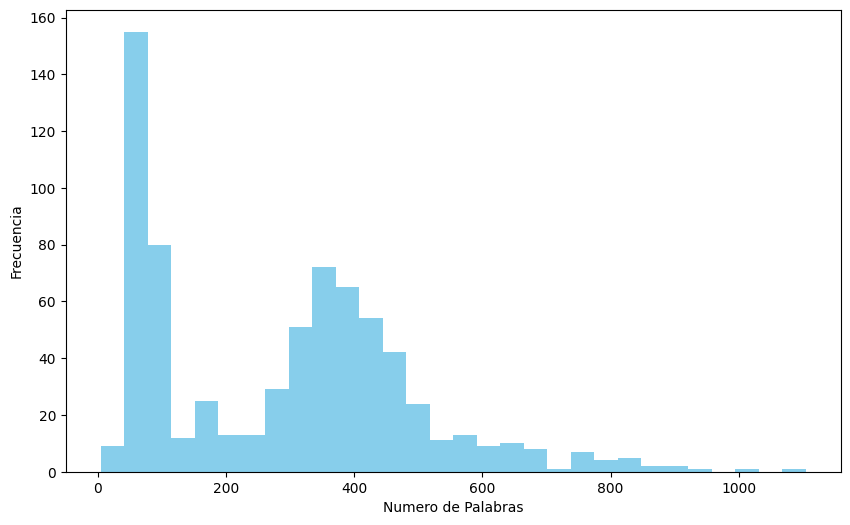

(-0.001, 200.0]    288
(200.0, 400.0]     222
(400.0, 600.0]     161
(600.0, 800.0]      35
(800.0, 1000.0]     11
(1000.0, inf]        2
Name: count, dtype: int64

In [4]:
df_len = pd.DataFrame(data)

def count_total_words(fila):
    return len(fila["Contenido"].split())

# Crea columna con el numero total de palabras para cada articulo
df_len["Total_Palabras"] = df_len.apply(count_total_words, axis = 1)

# Calcula promedio
promedio = df_len["Total_Palabras"].mean()
print(f"El promedio es: {promedio}")

# Creacion de grafico
plt.figure(figsize=(10,6))
plt.hist(df_len["Total_Palabras"], bins=30, color="skyblue")
plt.xlabel("Numero de Palabras")
plt.ylabel("Frecuencia")
plt.show()

# Cacula la frecuencia por rangos
df_len["Total_Palabras"].value_counts(bins=[0, 200, 400, 600, 800, 1000, float('inf')])


### Palabras comunes:
**¿Cuáles son las 10 palabras más frecuentes en los articulos?**

In [5]:
df_word = pd.DataFrame(data)

# Concatena todos los articulos y crea lista de palabras
words = " ".join(df_word["Contenido"]).lower().split()
# Calcula la frecuencia de cada palabra
sr_word = pd.Series(words)
count_word = sr_word.value_counts()

# Primeras 10 palabras
count_word[:10]


u         24579
tu         5796
ku         4530
ti’        4488
le         3998
yéetel     3974
ti’al      3255
tumen      3086
yaan       2539
ma’        2094
Name: count, dtype: int64

Junmúuch’ <strong style="color:red;">u</strong> íinjenieroilo’ob Google’ <strong style="color:red;">tu</strong> k’a’aytajo’ob <strong style="color:red;">le</strong> lunes máanika’,
<strong style="color:red;">u</strong> beetiko’ob jump’éel múuch’kabil. <br>
<strong style="color:red;">Le</strong> je’ela’ <strong style="color:red;">ma’</strong> jump’éel ba’al suuk <strong style="color:red;">u</strong> yúuchul ichil máaxo’ob <strong style="color:red;">ku</strong> meyajtiko’ob téeknolojia.

Un grupo de ingenieros de Google anunciaron el lunes que formaron un sindicato, <br> creando una inusual organización gremial en la industria de la tecnología.

 Tak walkila’ <strong style="color:red;">u</strong> beeta’al múuch’kabilo’ob <strong style="color:red;">tumen</strong> <strong style="color:red;">u</strong> ajmeyajil máako’ob téeknolojiae’ <strong style="color:red;">ma’</strong> jump’éel ba’al suuka’an <strong style="color:red;">u</strong> yu’ubali’, <br>
<strong style="color:red;">tumen</strong> ma’alo’ob <strong style="color:red;">u</strong> náajalo’ob <strong style="color:red;">yéetel</strong> <strong style="color:red;">yaan</strong> xan uláak’ bix <strong style="color:red;">u</strong> ts’a’abal áantaj ti’ob, <br> je’el bix <strong style="color:red;"> u</strong> tséentalo’ob sáansamal <strong style="color:red;">yéetel</strong> <strong style="color:red;">u</strong> ts’a’abal ba’al <strong style="color:red;">ti’al</strong> <strong style="color:red;">u</strong> bino’ob <strong style="color:red;">yéetel</strong> u suuto’ob <strong style="color:red;">ti’</strong> <strong style="color:red;">u</strong> meyajo’ob. 

Hasta ahora el sindicalismo no se ha arraigado entre los trabajadores de los sectores más exclusivos de la tecnología,<br>  que reciben abultados salarios y otras formas de compensación como comida gratis y transporte al trabajo. 

Español: https://www.lajornadamaya.mx/internacional/34746/ingenieros-forman-sindicato-en-google <br>
Maya: https://www.lajornadamaya.mx/k'iintsil/34797/u-iinjenieroilo-ob-googlee-tu-kaajsajo-ob-u-muuch-kabilo-ob-ti-al-u-yaanta-al-ajmeyajo-ob

### Ubicación de los articulos:
- **¿Cuáles son las ubicaciones más mencionadas en los articulos?**
- **¿Existen patrones geográficos claros en las noticias publicadas?**

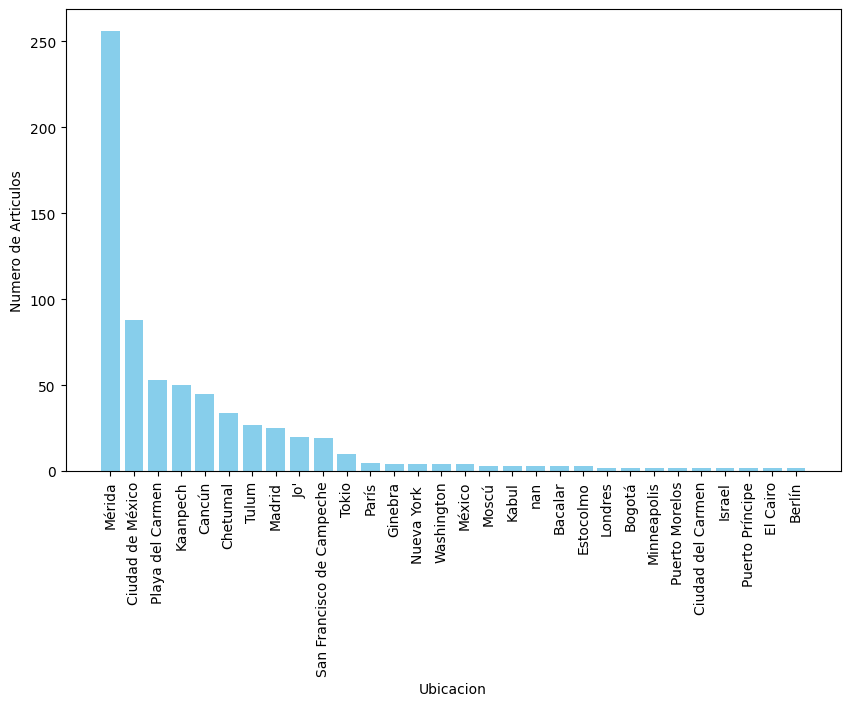

In [6]:
df_location = pd.DataFrame(data)

def get_city(location):
    return str(location).split(",")[0]

# Remplaza ubicacion por ciudad y calcula la frecuencia de las ciudades
df_location["Ubicacion"] = df_location["Ubicacion"].apply(get_city)
count_location = df_location["Ubicacion"].value_counts()[:30]

# Creacion de grafico
plt.figure(figsize=(10, 6))
plt.bar(count_location.index, count_location.values, color="skyblue")
plt.xticks(rotation=90)
plt.xlabel("Ubicacion")
plt.ylabel("Numero de Articulos")
plt.show()

### Análisis del traductor maya-español:
- **¿Cuántas palabras en las noticias están escritas en maya?**
- **¿Cuántas palabras provienen del español?**
- **¿Existen palabras que aparecen tanto en maya como en español?**

In [220]:
from collections import Counter
import re

# Función para generar n-gramas
def generate_ngrams(text, n=3):
    text = text.lower()
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    ngrams = [text[i:i+n] for i in range(len(text)-n+1)]
    return Counter(ngrams)

# Función para cargar el contenido del archivo
def load_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Cargar los textos en Maya Yucateco y Español desde archivos de texto
maya_text = load_text_from_file('maya_text.txt')  # Ruta al archivo de Maya Yucateco
spanish_text = load_text_from_file('spanish.txt')  # Ruta al archivo de Español

# Crear los perfiles de n-gramas para Maya Yucateco y Español
language_profiles = {
    'maya': generate_ngrams(maya_text, n=3),
    'es': generate_ngrams(spanish_text, n=3)
}

# Función para calcular la proporción
def proportion_similarity(profile1, profile2):
    intersection = set(profile1.keys()) & set(profile2.keys())
    matches = sum(profile1[ngram] for ngram in intersection)
    total = sum(profile1.values())
    return matches / total if total > 0 else 0.0

# Función para detectar el idioma
def detect_language(text):
    text_profile = generate_ngrams(text, n=3)
    similarities = {lang: proportion_similarity(text_profile, profile) for lang, profile in language_profiles.items()}
    detected_language = max(similarities, key=similarities.get)
    return detected_language, similarities

# Ejemplo de uso
text_to_detect = data["Contenido"][200]
detected_language, similarities = detect_language(text_to_detect)

print(f"Idioma detectado: {detected_language}")
print(f"Similitudes: {similarities}")

Idioma detectado: maya
Similitudes: {'maya': 0.876699484294421, 'es': 0.5410220346929208}


In [221]:
# Cargar el diccionario de español
def load_spanish_dictionary(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        # Leer todas las palabras en el diccionario y convertirlas a una lista
        spanish_dict = set(word.strip().lower() for word in file.readlines())
    return spanish_dict

# Función para contar palabras en maya y español
def count_words(text, spanish_dict):
    maya_count = 0
    spanish_count = 0
    words = text.split()  # Divide el texto en palabras
    
    for word in words:
        word_cleaned = word.strip('.,;!?()[]{}"').lower()  # Elimina signos de puntuación
        if word_cleaned in spanish_dict:
            spanish_count += 1
        else:
            maya_count += 1  # Si no está en el diccionario de español, asumimos que es maya
    
    return maya_count, spanish_count

# Cargar el diccionario de español desde un archivo
spanish_dict = load_spanish_dictionary('0_palabras_todas.txt')

# Ejemplo de texto para analizar
text = data["Contenido"][10]
print(text)

# Llamar la función
maya_count, spanish_count = count_words(text, spanish_dict)

print(f"Palabras en maya: {maya_count}")
print(f"Palabras en español: {spanish_count}")


Kaanpech yéetel Yucatáne’ náach p’aatalo’ob ti’ Quintana Roo ikil u táakbesa’alo’ob ti’ fíinansiero ba’alo’ob. Le ts’ook lu’uma’ ti’ yaan tu ka’ kúuchil uchil tuláakal u noj lu’umil México, tumen jo’op’éel u méek’tankaajilo’obe’ ka’anal yanik u káalifikaasiono’obi’, le beetike’ ti’ kaaje’ ku yantal uláak’ páajtalilo’ob ti’al u páajtal u machiko’ob taak’in yéetel beyo’ u ma’alo’obkúunsa’al u kuxtal máaxo’ob óoli’ p’ata’ano’ob paachil, je’el bix ko’olelo’ob, táaxnel kaajil máako’ob, ch’ija’an máako’ob, máasewalo’ob yéetel máaxo’ob kaja’ano’ob ti’ mejen kaajo’ob. 
Kaanpeche’ jatsa’an beey nivel medio tumen ti’ yaan tu jo’olajun kúuchil ti’ ba’ax k’ajóolta’an beey Índice de Inclusión Financiera 2020, beeta’an tumen Citibanamex, ka’alikil Yucatáne’ ti’ yaan tu waklajun kúuchil. 
Xookil ku beeta’ale’ ku núup’ul yéetel Política Nacional de Inclusión Financiera jts’a’ab k’ajóoltbil le ja’ab máaniko’ tu winalil marzo, tu’ux táan u kaxta’al u yantal uláak’ ba’alo’ob ti’al u yutsil kuxtal kaaj, u

In [222]:
maya_count = 0
spanish_count = 0
for index, row in data.iterrows():
    texto = row['Contenido']
    mc, sc = count_words(texto, spanish_dict)
    maya_count += mc
    spanish_count += sc
print(f"se encontraron un total de {spanish_count} palabras en español")
print(f"se encontraron un total de {maya_count} palabras en maya")

se encontraron un total de 51372 palabras en español
se encontraron un total de 157662 palabras en maya
